In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import requests
import json
import gmaps
from config import g_key
gmaps.configure(api_key=g_key)

In [2]:
def getLatLng(countryName):
    
    target_country = countryName

    params = {"address": target_country, "key": g_key}
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    response = requests.get(base_url, params=params)
    country_geo = response.json()
    lat = country_geo["results"][0]["geometry"]["location"]["lat"]
    lng = country_geo["results"][0]["geometry"]["location"]["lng"]
    return(lat, lng)

In [3]:
ebola_df = pd.read_csv('Resources/ebola.csv')
ebola_df

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0
...,...,...,...,...
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0


In [4]:
#list of countries
ebola_df.Country.unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

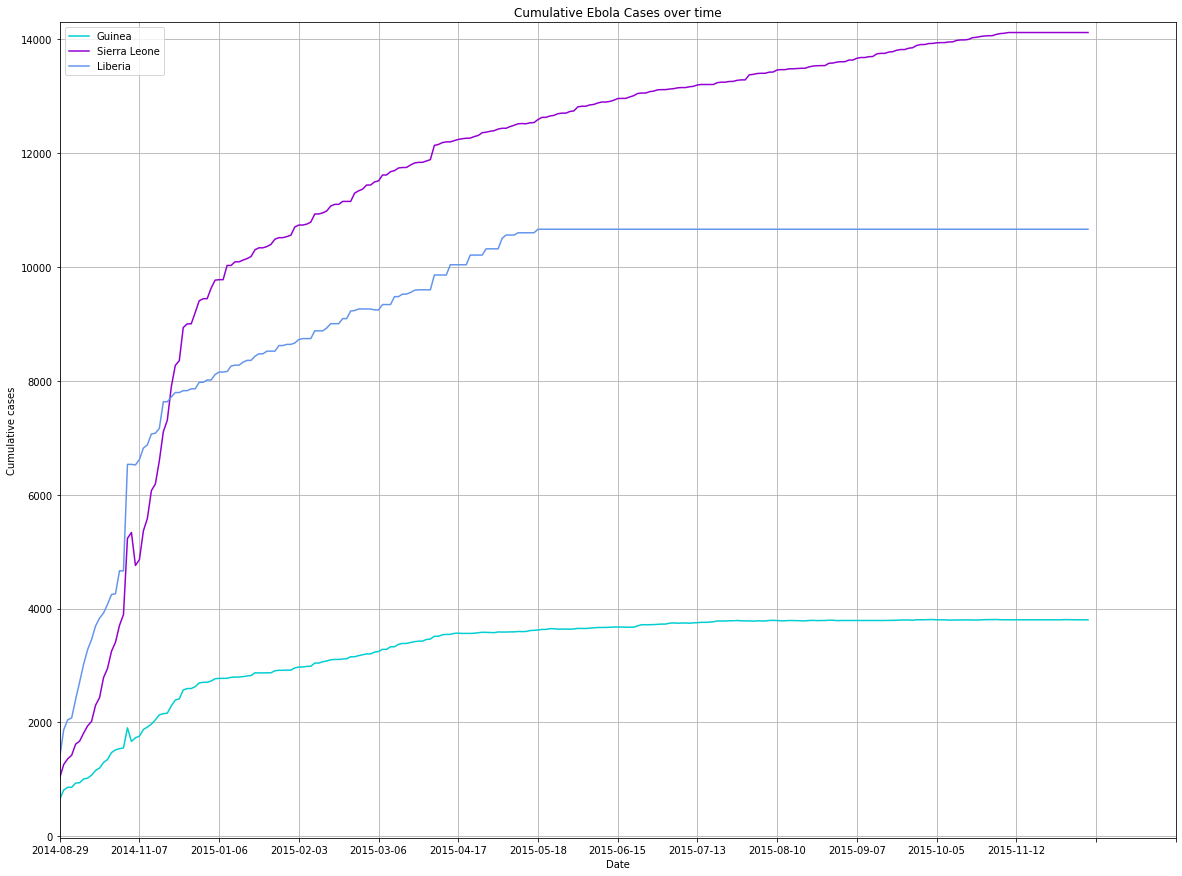

<Figure size 432x288 with 0 Axes>

In [5]:
#Cumulative line graph of cases over time per country
#Countries with high number of cases
#Guinea
guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
guinea_cases= guinea_df["Cumulative no. of confirmed, probable and suspected cases"]
x_axis1=guinea_df["Date"]
y_axis1=guinea_cases
fig= plt.figure(figsize=(20,15))
line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")

#Sierra Leone
sierraleone_df=ebola_df.loc[ebola_df["Country"]=="Sierra Leone"]
sierraleone_cases= sierraleone_df['Cumulative no. of confirmed, probable and suspected cases']
x_axis3=sierraleone_df["Date"]
y_axis3=sierraleone_cases
line3 = plt.plot(x_axis3, y_axis3, color="darkviolet", label="Sierra Leone")

#Liberia
liberia_df=ebola_df.loc[ebola_df["Country"]=="Liberia"]
liberia_df=liberia_df.loc[liberia_df["Cumulative no. of confirmed, probable and suspected cases"]>=1378]
liberia_cases= liberia_df['Cumulative no. of confirmed, probable and suspected cases']
x_axis4=liberia_df["Date"]
y_axis4=liberia_cases
line4 = plt.plot(x_axis4, y_axis4, color="cornflowerblue", label="Liberia")


plt.legend(loc="best")
plt.ylabel('Cumulative cases')
plt.xlabel("Date")
plt.title('Cumulative Ebola Cases over time')
plt.xlim(xmin=0)
plt.xlim(xmax=250)
plt.ylim(ymax=14300)

plt.xticks(np.arange(0, 300, step=20))
plt.xticks(rotation=0,horizontalalignment="center") 

plt.grid()
plt.show()
plt.savefig('Resources/Ebola_cases.png')

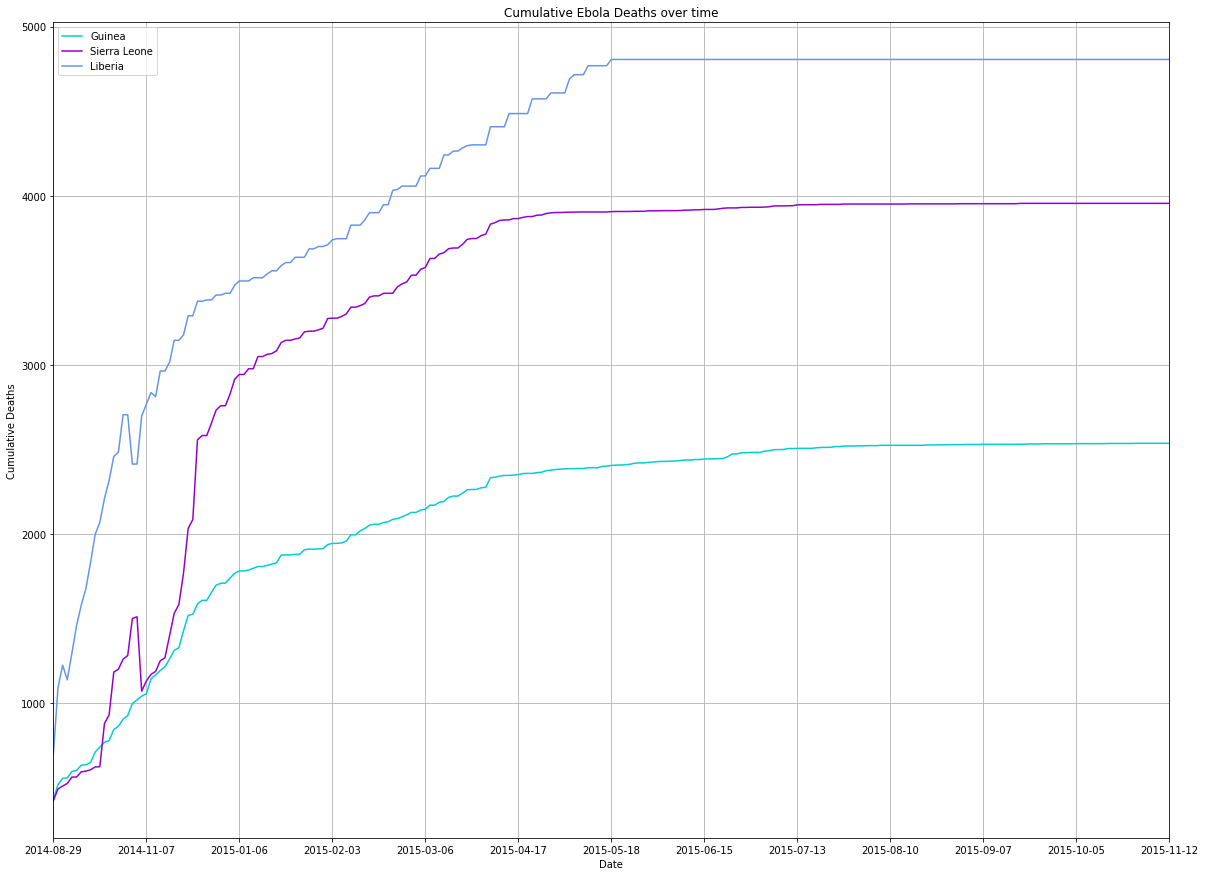

In [6]:
#Cumulative line graph of the number of deaths over time per country

#Guinea
guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
guinea_deaths= guinea_df["Cumulative no. of confirmed, probable and suspected deaths"]
x_axis1=guinea_df["Date"]
y_axis1=guinea_deaths
fig= plt.figure(figsize=(20,15))
line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")
#Sierra Leone
sierraleone_df=ebola_df.loc[ebola_df["Country"]=="Sierra Leone"]
sierraleone_deaths= sierraleone_df['Cumulative no. of confirmed, probable and suspected deaths']
x_axis3=sierraleone_df["Date"]
y_axis3=sierraleone_deaths
line3 = plt.plot(x_axis3, y_axis3, color="darkviolet", label="Sierra Leone")
#Liberia
liberia_df=ebola_df.loc[ebola_df["Country"]=="Liberia"]
liberia_df=liberia_df.loc[liberia_df["Cumulative no. of confirmed, probable and suspected cases"]>=694]
liberia_deaths= liberia_df['Cumulative no. of confirmed, probable and suspected deaths']
x_axis4=liberia_df["Date"]
y_axis4=liberia_deaths
line4 = plt.plot(x_axis4, y_axis4, color="cornflowerblue", label="Liberia")

plt.legend(loc="best")
plt.ylabel('Cumulative Deaths')
plt.xlabel("Date")
plt.title('Cumulative Ebola Deaths over time')
plt.xticks(np.arange(0, 300, step=20))
plt.grid()
plt.xlim(xmin=0)
plt.xlim(xmax=240)
plt.savefig('Resources/Ebola_deaths.png')

In [7]:
#bar chart of total cases per country
top_three=['Liberia', 'Sierra Leone', 'Guinea']
ebola_countries_df=ebola_df[ebola_df.Country.isin(top_three)]
ebola_countries_df
total_cases= ebola_countries_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected cases"].max()
total_cases_df = pd.DataFrame(total_cases)
total_cases_df.reset_index(inplace=True)
total_cases_df

,Country,"Cumulative no. of confirmed, probable and suspected cases"
0,Guinea,3810.0
1,Liberia,10666.0
2,Sierra Leone,14122.0


In [8]:
for c in total_cases_df.Country:
    lattitude, longitude = getLatLng(c)
    total_cases_df.loc[total_cases_df['Country']==c,'Lat'] = lattitude
    total_cases_df.loc[total_cases_df['Country']==c,'Lng'] = longitude

In [9]:
total_cases_df

,Country,"Cumulative no. of confirmed, probable and suspected cases",Lat,Lng
0,Guinea,3810.0,9.945587,-9.696645
1,Liberia,10666.0,6.428055,-9.429499
2,Sierra Leone,14122.0,8.460555,-11.779889


In [10]:
# Create a list containing coordinates
coordinates = list(zip(total_cases_df['Lat'],total_cases_df['Lng']))
coordinates

[(9.945587, -9.696645), (6.428055, -9.429499000000002), (8.460555, -11.779889)]

In [11]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

markers = gmaps.marker_layer(coordinates)
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

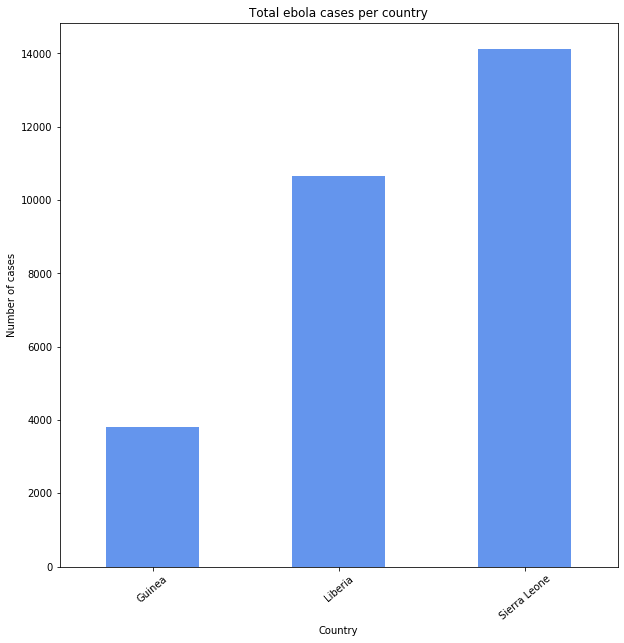

In [12]:
#bar graph
fig= plt.figure(figsize=(10,10))
total_cases.plot(kind="bar", color= 'cornflowerblue')
plt.xlabel("Country")
plt.xticks(rotation=40)
plt.ylabel("Number of cases")
plt.title("Total ebola cases per country")
plt.savefig('Resources/EbolaCasesPerCountry.png')

In [13]:
total_deaths= ebola_countries_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected deaths"].max()
total_deaths_df = pd.DataFrame(total_deaths)
total_deaths_df.reset_index()

,Country,"Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2536.0
1,Liberia,4806.0
2,Sierra Leone,3955.0


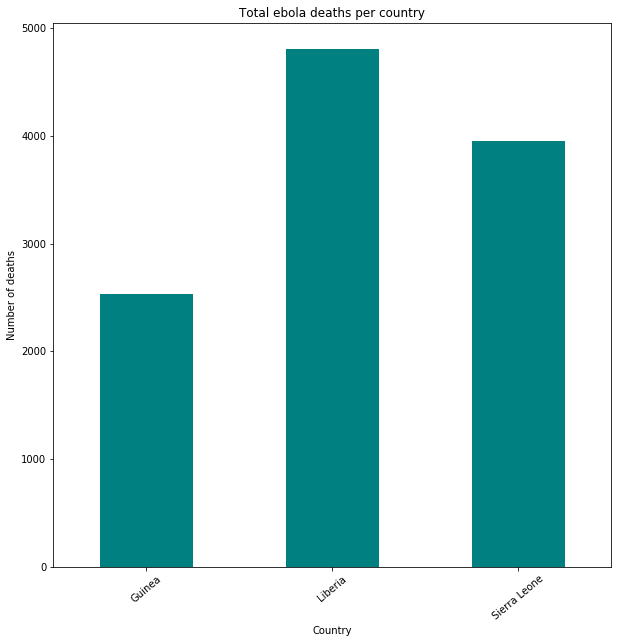

In [14]:
#bar chart deaths
fig= plt.figure(figsize=(10,10))
total_deaths.plot(kind="bar", color= 'teal')
plt.xlabel("Country")
plt.xticks(rotation=40)
plt.ylabel("Number of deaths")
plt.title("Total ebola deaths per country")
plt.savefig('Resources/EbolaDeathsPerCountry')

In [15]:
death_rate=(total_deaths/total_cases)*100
d = {"Country": ["Guinea","Liberia","Sierra Leone"]}
df = pd.DataFrame(data=d)
df["Death Rate Percent"] = death_rate[0],death_rate[1],death_rate[2]
df

,Country,Death Rate Percent
0,Guinea,66.561680
1,Liberia,45.059066
2,Sierra Leone,28.005948


In [16]:
total_cases_world= ebola_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected cases"].max()
tot_df = pd.DataFrame(total_cases_world)
tot_df.reset_index()

,Country,"Cumulative no. of confirmed, probable and suspected cases"
0,Guinea,3810.0
1,Italy,1.0
2,Liberia,10666.0
3,Mali,8.0
4,Nigeria,22.0
5,Senegal,3.0
6,Sierra Leone,14122.0
7,Spain,1.0
8,United Kingdom,1.0
9,United States of America,4.0


In [17]:
total_cases_sum= total_cases_world.sum()
total_cases_sum

28638.0

In [18]:
total_deaths_world= ebola_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected deaths"].max()
tot_death_df = pd.DataFrame(total_deaths_world)
tot_death_df.reset_index()

,Country,"Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2536.0
1,Italy,0.0
2,Liberia,4806.0
3,Mali,6.0
4,Nigeria,8.0
5,Senegal,0.0
6,Sierra Leone,3955.0
7,Spain,0.0
8,United Kingdom,0.0
9,United States of America,1.0


In [19]:
total_deaths_sum= total_deaths_world.sum()
total_deaths_sum

11312.0

In [20]:
avg_death_rate= (total_deaths_sum/total_cases_sum)*100
avg_death_rate.round(2)

39.5

In [21]:
ebola_pop = pd.read_csv('Resources/Population by country.csv')
ebola_pop.rename(columns={"Country Name":"Country"})

,Country,Population (2014)
0,Spain,46480882
1,United Kingdom,64602298
2,Guinea,11150977
3,Italy,60789140
4,Liberia,4359505
5,Mali,16934220
6,Nigeria,176404902
7,Senegal,14174731
8,Sierra Leone,7017144
9,United States of America,318301008


In [22]:
data = {'Country':['Guinea', 'Liberia', 'Sierra Leone'],
        'Cases':[3810, 10666, 14122],
        'Deaths':[2536,4806,3955],
        'Population':[11150977,4359505 ,7017144 ],
        'GDP per capita (USD)':[1064, 621, 504],
        'Hospital beds per 1000 people':[0.3,0.8,0.4]}

# Create DataFrame
cases_per_pop = pd.DataFrame(data)
cases_per_pop

cases_pop_df=cases_per_pop
cases_pop_df['Cases per 10,000 population'] = ((cases_pop_df['Cases'])/(cases_pop_df['Population']))*10000
cases_pop_df['Deaths per 10,000 population'] = ((cases_pop_df['Deaths'])/(cases_pop_df['Population']))*10000
cases_pop_df.round(2)      

,Country,Cases,Deaths,Population,GDP per capita (USD),Hospital beds per 1000 people,"Cases per 10,000 population","Deaths per 10,000 population"
0,Guinea,3810,2536,11150977,1064,0.3,3.42,2.27
1,Liberia,10666,4806,4359505,621,0.8,24.47,11.02
2,Sierra Leone,14122,3955,7017144,504,0.4,20.12,5.64


In [23]:
data2 = {'Country':['Guinea', 'Liberia', 'Sierra Leone', "Canada",'China', 'Hong Kong', 'Singapore', 'Taiwan', 'United States' ],
         'Type': ['Ebola','Ebola','Ebola', 'SARS', 'SARS','SARS','SARS', 'SARS', 'SARS'],
         'Population': [11150977,4359505 ,7017144, 32207113,1286975468, 7394170,4608595,22603001,290342554],
         'GDP per capita (USD)':[1064, 621, 504,46194,10261, 48755, 65233, 24828, 65280],
         'healthcare expenditure (% GDP)' :[4.12,8.16,13.42,10.75,5.15,5.9,4.44,6.1,17.06],
         'Pandemic Prepardness Score': [32.7, 35.1,38.2, 75.3, 48.2,48.2,58.7,48.2,83.5],
         'Hospital beds per 1000 people':[0.3,0.8,0.4,2.7,4.2,4.9,2.4,5.7,2.9]}

country_data= pd.DataFrame(data2) 
country_data

,Country,Type,Population,GDP per capita (USD),healthcare expenditure (% GDP),Pandemic Prepardness Score,Hospital beds per 1000 people
0,Guinea,Ebola,11150977,1064,4.12,32.7,0.3
1,Liberia,Ebola,4359505,621,8.16,35.1,0.8
2,Sierra Leone,Ebola,7017144,504,13.42,38.2,0.4
3,Canada,SARS,32207113,46194,10.75,75.3,2.7
4,China,SARS,1286975468,10261,5.15,48.2,4.2
5,Hong Kong,SARS,7394170,48755,5.90,48.2,4.9
6,Singapore,SARS,4608595,65233,4.44,58.7,2.4
7,Taiwan,SARS,22603001,24828,6.10,48.2,5.7
8,United States,SARS,290342554,65280,17.06,83.5,2.9


Ebola is spread through direct contact with body fluids of an infected person. It is not airborne and cannot be spread until a person is showing syptoms of ebola

# SARS Analysis 

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

output_data_file = "Resources/SARS.csv"
with open(output_data_file, "r", encoding="utf-8") as read_file:
    sarsData = pd.read_csv(read_file)

sarsDF = pd.DataFrame(sarsData)
sarsDF

,Date,Month,Day,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,"April 1, 2003",April,1,Australia,1,0,0
1,"April 2, 2003",April,2,Australia,1,0,0
2,"April 3, 2003",April,3,Australia,1,0,0
3,"April 4, 2003",April,4,Australia,1,0,0
4,"April 5, 2003",April,5,Australia,1,0,0
...,...,...,...,...,...,...,...
2533,"July 7, 2003",July,7,Viet Nam,63,5,58
2534,"July 8, 2003",July,8,Viet Nam,63,5,58
2535,"July 9, 2003",July,9,Viet Nam,63,5,58
2536,"July 10, 2003",July,10,Viet Nam,63,5,58


In [25]:
newdf = sarsDF.groupby("Country")["Cumulative number of case(s)"].max()
newdf = pd.DataFrame(newdf).reset_index()
topdf = newdf.loc[newdf["Cumulative number of case(s)"] >= 100]
topdf

,Country,Cumulative number of case(s)
4,Canada,252
5,China,5329
10,"Hong Kong SAR, China",1755
26,Singapore,206
32,"Taiwan, China",698
35,United States,220


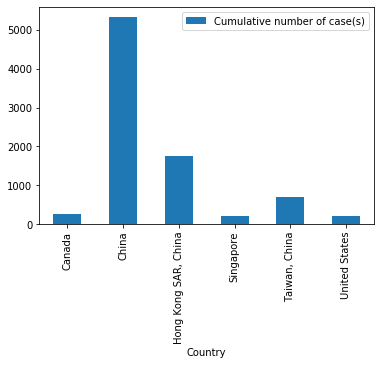

In [26]:
barplot = topdf.plot.bar(x="Country", y="Cumulative number of case(s)")
barplot

In [27]:
output_data_file = "Resources/Countries.csv"
with open(output_data_file, "r", encoding="utf-8") as read_file:
    countriesData = pd.read_csv(read_file)

countriesDF = pd.DataFrame(countriesData)
countriesDF

,Countries List,Populations 2003
0,Australia,"19,731,984"
1,Belgium,"10,289,088"
2,Brazil,"182,032,604"
3,Bulgaria,"7,537,929"
4,Canada,"32,207,113"
5,China,"1,286,975,468"
6,Colombia,"41,662,073"
7,Finland,"5,190,785"
8,France,"60,180,529"
9,Germany,"82,398,326"


In [28]:
deaths = sarsDF.groupby("Country")["Number of deaths"].max()
deaths = pd.DataFrame(deaths).reset_index()
deaths

,Country,Number of deaths
0,Australia,0
1,Belgium,0
2,Brazil,0
3,Bulgaria,0
4,Canada,38
5,China,348
6,Colombia,0
7,Finland,0
8,France,1
9,Germany,0


In [29]:
recovered = sarsDF.groupby("Country")["Number recovered"].max()
recovered = pd.DataFrame(recovered).reset_index()
recovered

,Country,Number recovered
0,Australia,6
1,Belgium,0
2,Brazil,2
3,Bulgaria,0
4,Canada,194
5,China,4941
6,Colombia,1
7,Finland,1
8,France,6
9,Germany,9


In [30]:
mainDF = pd.merge(left= topdf, right=countriesDF, how='left', left_on='Country', right_on='Countries List')
mainDF

,Country,Cumulative number of case(s),Countries List,Populations 2003
0,Canada,252,NaN,NaN
1,China,5329,China,"1,286,975,468"
2,"Hong Kong SAR, China",1755,"Hong Kong SAR, China","7,394,170"
3,Singapore,206,Singapore,"4,608,595"
4,"Taiwan, China",698,"Taiwan, China","22,603,001"
5,United States,220,United States,"290,342,554"


In [31]:
mainDF = pd.merge(left= mainDF, right=deaths, how='left', left_on='Country', right_on='Country')
mainDF

,Country,Cumulative number of case(s),Countries List,Populations 2003,Number of deaths
0,Canada,252,NaN,NaN,38
1,China,5329,China,"1,286,975,468",348
2,"Hong Kong SAR, China",1755,"Hong Kong SAR, China","7,394,170",298
3,Singapore,206,Singapore,"4,608,595",32
4,"Taiwan, China",698,"Taiwan, China","22,603,001",84
5,United States,220,United States,"290,342,554",0


In [32]:
mainDF = pd.merge(left= mainDF, right=recovered, how='left', left_on='Country', right_on='Country')
mainDF

,Country,Cumulative number of case(s),Countries List,Populations 2003,Number of deaths,Number recovered
0,Canada,252,NaN,NaN,38,194
1,China,5329,China,"1,286,975,468",348,4941
2,"Hong Kong SAR, China",1755,"Hong Kong SAR, China","7,394,170",298,1433
3,Singapore,206,Singapore,"4,608,595",32,172
4,"Taiwan, China",698,"Taiwan, China","22,603,001",84,507
5,United States,220,United States,"290,342,554",0,67


In [33]:
del mainDF['Countries List']
mainDF['Populations 2003'] = mainDF['Populations 2003'].replace(np.nan, "32,207,113")
mainDF

,Country,Cumulative number of case(s),Populations 2003,Number of deaths,Number recovered
0,Canada,252,"32,207,113",38,194
1,China,5329,"1,286,975,468",348,4941
2,"Hong Kong SAR, China",1755,"7,394,170",298,1433
3,Singapore,206,"4,608,595",32,172
4,"Taiwan, China",698,"22,603,001",84,507
5,United States,220,"290,342,554",0,67


In [34]:
for c in mainDF.Country:
    lattitude, longitude = getLatLng(c)
    mainDF.loc[mainDF['Country']==c,'Lat'] = lattitude
    mainDF.loc[mainDF['Country']==c,'Lng'] = longitude

In [35]:
coordinates = list(zip(mainDF['Lat'],mainDF['Lng']))
coordinates

[(56.130366, -106.346771),
 (35.86166, 104.195397),
 (22.3193039, 114.1693611),
 (1.352083, 103.819836),
 (23.69781, 120.960515),
 (37.09024, -95.712891)]

In [36]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

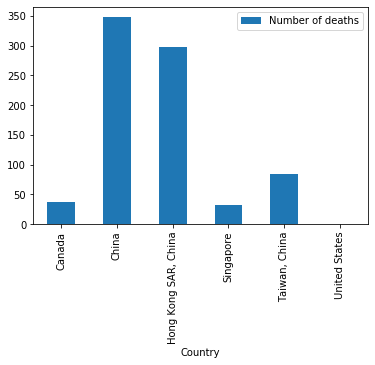

In [37]:
barplot = mainDF.plot.bar(x="Country", y="Number of deaths")
barplot

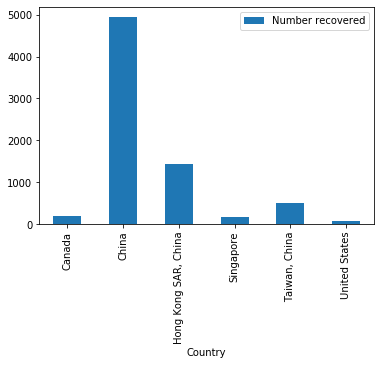

In [38]:
barplot = mainDF.plot.bar(x="Country", y="Number recovered")
barplot

In [39]:
output_data_file = "Resources/topSARS.csv"
with open(output_data_file, "r", encoding="utf-8") as read_file:
    sars = pd.read_csv(read_file)
topSARS = pd.DataFrame(sars)
topSARS

,Date,Month,Day,Country,Cumulative number of case(s),Number of deaths,Number recovered,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,17-Mar-03,March,17,Canada,8,2,0,NaN,NaN,NaN,NaN,NaN
1,18-Mar-03,March,18,Canada,8,2,0,NaN,NaN,NaN,NaN,NaN
2,19-Mar-03,March,19,Canada,8,2,0,NaN,NaN,NaN,NaN,NaN
3,20-Mar-03,March,20,Canada,9,2,0,NaN,NaN,NaN,NaN,NaN
4,21-Mar-03,March,21,Canada,9,2,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
568,7-Jul-03,July,7,United States,220,0,65,NaN,NaN,NaN,NaN,NaN
569,8-Jul-03,July,8,United States,220,0,64,NaN,NaN,NaN,NaN,NaN
570,9-Jul-03,July,9,United States,220,0,67,NaN,NaN,NaN,NaN,NaN
571,10-Jul-03,July,10,United States,220,0,67,NaN,NaN,NaN,NaN,NaN


In [40]:
del topSARS['Unnamed: 7']
del topSARS['Unnamed: 8']
del topSARS['Unnamed: 9']
del topSARS['Unnamed: 10']
del topSARS['Unnamed: 11']
topSARS

,Date,Month,Day,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,17-Mar-03,March,17,Canada,8,2,0
1,18-Mar-03,March,18,Canada,8,2,0
2,19-Mar-03,March,19,Canada,8,2,0
3,20-Mar-03,March,20,Canada,9,2,0
4,21-Mar-03,March,21,Canada,9,2,0
...,...,...,...,...,...,...,...
568,7-Jul-03,July,7,United States,220,0,65
569,8-Jul-03,July,8,United States,220,0,64
570,9-Jul-03,July,9,United States,220,0,67
571,10-Jul-03,July,10,United States,220,0,67


/Users/juanferc/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


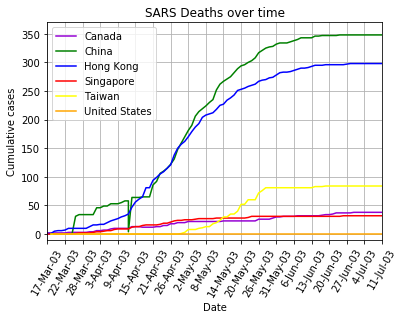

<Figure size 432x288 with 0 Axes>

In [41]:
#Deaths by Country over Time Period 

#Canada
canada =topSARS.loc[topSARS["Country"]=="Canada"]
canadaDeaths= canada['Number of deaths']
xAxis1=canada["Date"]
yAxis1=canadaDeaths
line1 = plt.plot(xAxis1, yAxis1, color="darkviolet", label="Canada")

#China
china =topSARS.loc[topSARS["Country"]=="China"]
chinaDeaths= china['Number of deaths']
xAxis2=china["Date"]
yAxis2=chinaDeaths
line2 = plt.plot(xAxis2, yAxis2, color="green", label="China")

#Hong Kong 
hk =topSARS.loc[topSARS["Country"]=="Hong Kong SAR, China"]
hkDeaths= hk['Number of deaths']
xAxis3=hk["Date"]
yAxis3=hkDeaths
line3 = plt.plot(xAxis3, yAxis3, color="blue", label="Hong Kong")

#Singapore 
singapore =topSARS.loc[topSARS["Country"]=="Singapore"]
singaporeDeaths= singapore['Number of deaths']
xAxis4=singapore["Date"]
yAxis4=singaporeDeaths
line4 = plt.plot(xAxis4, yAxis4, color="red", label="Singapore")

#Taiwan
taiwan =topSARS.loc[topSARS["Country"]=="Taiwan, China"]
taiwanDeaths= taiwan['Number of deaths']
xAxis5=taiwan["Date"]
yAxis5=taiwanDeaths
line5 = plt.plot(xAxis5, yAxis5, color="yellow", label="Taiwan")

#USA
usa =topSARS.loc[topSARS["Country"]=="United States"]
usaDeaths= usa['Number of deaths']
xAxis6=usa["Date"]
yAxis6=usaDeaths
line6 = plt.plot(xAxis6, yAxis6, color="orange", label="United States")

plt.legend(loc="best")
plt.ylabel('Cumulative cases')
plt.xlabel("Date")
plt.title('SARS Deaths over time')
plt.xlim(xmax=0)
plt.xlim(xmin=0)
plt.xticks(np.arange(0, 100, step=5))
plt.xticks(rotation=60,horizontalalignment="center") 
plt.ylim(ymax=370)
plt.ylim(ymin=-10)
plt.grid()
plt.show()
plt.savefig('Resources/SarsDeaths1.png')

/Users/juanferc/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


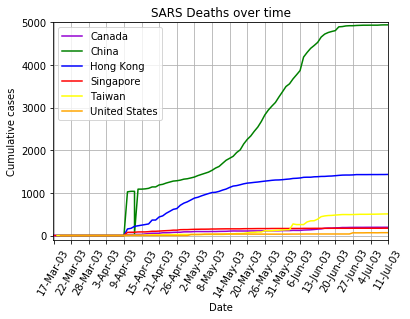

<Figure size 432x288 with 0 Axes>

In [42]:
#Recovered by Country over Time Period 

#Canada
canada =topSARS.loc[topSARS["Country"]=="Canada"]
canadaRecov= canada['Number recovered']
xAxis1=canada["Date"]
yAxis1=canadaRecov
line1 = plt.plot(xAxis1, yAxis1, color="darkviolet", label="Canada")

#China
china =topSARS.loc[topSARS["Country"]=="China"]
chinaRecov= china['Number recovered']
xAxis2=china["Date"]
yAxis2=chinaRecov
line2 = plt.plot(xAxis2, yAxis2, color="green", label="China")

#Hong Kong 
hk =topSARS.loc[topSARS["Country"]=="Hong Kong SAR, China"]
hkRecov= hk['Number recovered']
xAxis3=hk["Date"]
yAxis3=hkRecov
line3 = plt.plot(xAxis3, yAxis3, color="blue", label="Hong Kong")

#Singapore 
singapore =topSARS.loc[topSARS["Country"]=="Singapore"]
singaporeRecov= singapore['Number recovered']
xAxis4=singapore["Date"]
yAxis4=singaporeRecov
line4 = plt.plot(xAxis4, yAxis4, color="red", label="Singapore")

#Taiwan
taiwan =topSARS.loc[topSARS["Country"]=="Taiwan, China"]
taiwanRecov= taiwan['Number recovered']
xAxis5=taiwan["Date"]
yAxis5=taiwanRecov
line5 = plt.plot(xAxis5, yAxis5, color="yellow", label="Taiwan")

#USA
usa =topSARS.loc[topSARS["Country"]=="United States"]
usaRecov= usa['Number recovered']
xAxis6=usa["Date"]
yAxis6=usaRecov
line6 = plt.plot(xAxis6, yAxis6, color="orange", label="United States")

plt.legend(loc="best")
plt.ylabel('Cumulative cases')
plt.xlabel("Date")
plt.title('SARS Deaths over time')
plt.xlim(xmax=0)
plt.xlim(xmin=0)
plt.ylim(ymax=5000)
plt.ylim(ymin=-100)
plt.xticks(np.arange(0, 100, step=5))
plt.xticks(rotation=60,horizontalalignment="center") 


plt.grid()
plt.show()
plt.savefig('Resources/SarsDeaths.png')

/Users/juanferc/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


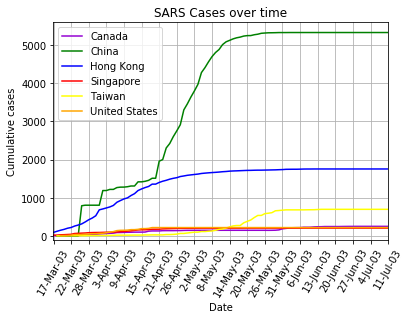

<Figure size 432x288 with 0 Axes>

In [43]:
#Cases by Country over Time Period 

#Canada
canada =topSARS.loc[topSARS["Country"]=="Canada"]
canadaCases= canada['Cumulative number of case(s)']
xAxis1=canada["Date"]
yAxis1=canadaCases
line1 = plt.plot(xAxis1, yAxis1, color="darkviolet", label="Canada")

#China
china =topSARS.loc[topSARS["Country"]=="China"]
chinaCases= china['Cumulative number of case(s)']
xAxis2=china["Date"]
yAxis2=chinaCases
line2 = plt.plot(xAxis2, yAxis2, color="green", label="China")

#Hong Kong 
hk =topSARS.loc[topSARS["Country"]=="Hong Kong SAR, China"]
hkCases= hk['Cumulative number of case(s)']
xAxis3=hk["Date"]
yAxis3=hkCases
line3 = plt.plot(xAxis3, yAxis3, color="blue", label="Hong Kong")

#Singapore 
singapore =topSARS.loc[topSARS["Country"]=="Singapore"]
singaporeCases= singapore['Cumulative number of case(s)']
xAxis4=singapore["Date"]
yAxis4=singaporeCases
line4 = plt.plot(xAxis4, yAxis4, color="red", label="Singapore")

#Taiwan
taiwan =topSARS.loc[topSARS["Country"]=="Taiwan, China"]
taiwanCases= taiwan['Cumulative number of case(s)']
xAxis5=taiwan["Date"]
yAxis5=taiwanCases
line5 = plt.plot(xAxis5, yAxis5, color="yellow", label="Taiwan")

#USA
usa =topSARS.loc[topSARS["Country"]=="United States"]
usaCases= usa['Cumulative number of case(s)']
xAxis6=usa["Date"]
yAxis6=usaCases
line6 = plt.plot(xAxis6, yAxis6, color="orange", label="United States")

plt.legend(loc="best")
plt.ylabel('Cumulative cases')
plt.xlabel("Date")
plt.title('SARS Cases over time')
plt.xlim(xmin=0)
plt.xlim(xmax=0)
plt.ylim(ymin=-100)
plt.xticks(np.arange(0, 100, step=5))
plt.xticks(rotation=60,horizontalalignment="center") 

plt.grid()
plt.show()
plt.savefig('Resources/SarsCases.png')

In [44]:
#Rates Dataframe

data = {'Country':['Canada', 'China', 'Hong Kong SAR, China', 'Singapore', 'Taiwan, China', 'United States'],
        'Cases':[252, 5329,1755,206,698,220],
        'Deaths':[38,348,298,32,84,0],
        'Recoveries':[194,4941,1433,172,507,67],
        'Population':[32207113,1286975468,7394170,4608595,22603001,290342554]}                  

# Create DataFrame
cases_per_pop_sars = pd.DataFrame(data)
cases_per_pop_sars

cases_pop_sars_df=cases_per_pop_sars
cases_pop_sars_df['Cases per 10,000 population']= ((cases_pop_sars_df['Cases'])/(cases_pop_sars_df['Population']))*10000
cases_pop_sars_df['Deaths per 10,000 population']= ((cases_pop_sars_df['Deaths'])/(cases_pop_sars_df['Population']))*10000
cases_pop_sars_df['Recoveries per 10,000 population'] = ((cases_pop_sars_df['Recoveries'])/(cases_pop_sars_df['Population']))*10000
cases_pop_sars_df.round(2)
cases_pop_sars_df

,Country,Cases,Deaths,Recoveries,Population,"Cases per 10,000 population","Deaths per 10,000 population","Recoveries per 10,000 population"
0,Canada,252,38,194,32207113,0.078244,0.011799,0.060235
1,China,5329,348,4941,1286975468,0.041407,0.002704,0.038392
2,"Hong Kong SAR, China",1755,298,1433,7394170,2.373492,0.403020,1.938013
3,Singapore,206,32,172,4608595,0.446991,0.069435,0.373216
4,"Taiwan, China",698,84,507,22603001,0.308809,0.037163,0.224306
5,United States,220,0,67,290342554,0.007577,0.000000,0.002308


# Ebola and Sars Combined Analysis

In [45]:
#Total number cases per desease. 
total_ebola_cases = total_cases_sum
total_ebola_cases

total_sars_cases = mainDF['Cumulative number of case(s)'].sum()
total_sars_cases

#create dataframe data set
cases_data = {'Disease':['Ebola', 'SARS'],
        'Cases':[total_ebola_cases,total_sars_cases]}                 

#create new dataframe
ebola_sars_cases_df = pd.DataFrame(cases_data)
ebola_sars_cases_df

#set index for new dataframe
ebola_sars_cases_df.set_index('Disease', inplace=True)
ebola_sars_cases_df.head()

,Cases
Disease,
Ebola,28638.0
SARS,8460.0


<Figure size 720x720 with 0 Axes>

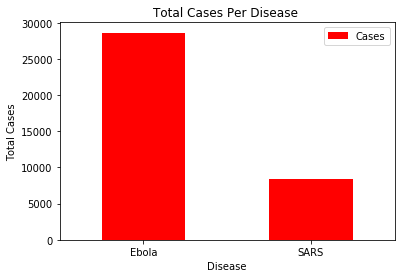

In [46]:
#bar chart of cases per disease
fig= plt.figure(figsize=(10,10))
ebola_sars_cases_df.plot(kind="bar", color= 'red')
plt.xlabel("Disease")
plt.xticks(rotation=0)
plt.ylabel("Total Cases")
plt.title("Total Cases Per Disease ")
plt.savefig('Resources/TotalCasesPerDisease.png')

In [47]:
#Total number deaths per desease. 
total_ebola_deaths = total_deaths_sum
total_ebola_deaths

total_sars_deaths = mainDF['Number of deaths'].sum()
total_sars_deaths

#create dataframe data set
cases_data_2 = {'Disease':['Ebola', 'SARS'],
        'Deaths':[total_ebola_deaths,total_sars_deaths]}                 

#create new dataframe
ebola_sars_deaths_df = pd.DataFrame(cases_data_2)
ebola_sars_deaths_df

#set index for new dataframe
ebola_sars_deaths_df.set_index('Disease', inplace=True)
ebola_sars_deaths_df.head()

,Deaths
Disease,
Ebola,11312.0
SARS,800.0


<Figure size 720x720 with 0 Axes>

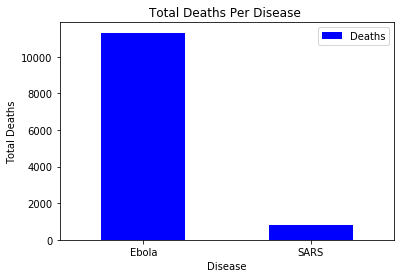

In [48]:
fig= plt.figure(figsize=(10,10))
ebola_sars_deaths_df.plot(kind="bar", color= 'blue')
plt.xlabel("Disease")
plt.xticks(rotation=0)
plt.ylabel("Total Deaths")
plt.title("Total Deaths Per Disease ")
plt.savefig('Resources/TotalDeathsPerDiseas.png')

In [57]:
ebola_avg_death_rate = (total_deaths_sum/total_cases_sum)*100
ebola_avg_death_rate.round(2)
sars_avg_death_rate = (total_sars_deaths/total_sars_cases)*100
sars_avg_death_rate.round(2)

deaths_data = {'Disease':['Ebola','SARS'],
              'Avg. Deaths': [ebola_avg_death_rate.round(2),
                             sars_avg_death_rate.round(2)]}

ebola_sars_avg_deaths_df = pd.DataFrame(deaths_data)
ebola_sars_avg_deaths_df.set_index('Disease',inplace=True)
ebola_sars_avg_deaths_df.head()

NameError: name 'sars_avg_death_rate' is not defined

<Figure size 720x720 with 0 Axes>

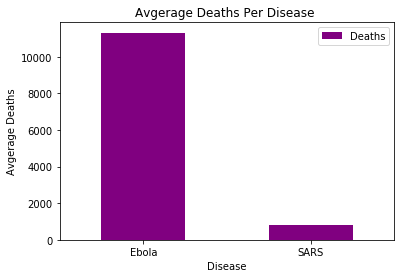

In [50]:
fig= plt.figure(figsize=(10,10))
ebola_sars_avg_deaths_df.plot(kind="bar", color= 'purple')
plt.xlabel("Disease")
plt.xticks(rotation=0)
plt.ylabel("Avgerage Deaths")
plt.title("Avgerage Deaths Per Disease ")
plt.savefig('Resources/AvgDeathsPerDiseas.png')

In [51]:
#Cases per 10K population.
ebola_avg_cases_pop_10K = cases_pop_df['Cases per 10,000 population'].mean()
ebola_avg_cases_pop_10K

sars_avg_cases_pop_10K = cases_pop_sars_df['Cases per 10,000 population'].mean()
sars_avg_cases_pop_10K

#create dataframe data set
cases_pop_data = {'Disease':['Ebola', 'SARS'],
        'Avgerage Cases Per 10k Population':[ebola_avg_cases_pop_10K,sars_avg_cases_pop_10K]}     

#create new dataframe
ebola_sars_avg_cases_10k_df = pd.DataFrame(cases_pop_data)
ebola_sars_avg_cases_10k_df

#set index for new dataframe
ebola_sars_avg_cases_10k_df.set_index('Disease', inplace=True)
ebola_sars_avg_cases_10k_df.head()

,Avgerage Cases Per 10k Population
Disease,
Ebola,16.002606
SARS,0.542753


<Figure size 720x720 with 0 Axes>

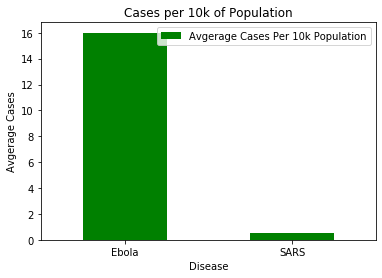

In [52]:
#bar chart of avg. cases per 10K population
fig= plt.figure(figsize=(10,10))
ebola_sars_avg_cases_10k_df.plot.bar(color= ['green'])
plt.xlabel("Disease")
plt.xticks(rotation=0)
plt.ylabel("Avgerage Cases")
plt.title("Cases per 10k of Population")
plt.savefig('Resources/casesPerpop.png')

In [53]:
#Deaths per 10K population.
ebola_avg_deaths_pop_10K = cases_pop_df['Deaths per 10,000 population'].mean()
ebola_avg_deaths_pop_10K

sars_avg_deaths_pop_10K = cases_pop_sars_df['Deaths per 10,000 population'].mean()
sars_avg_deaths_pop_10K

#create dataframe data set
deaths_pop_data = {'Disease':['Ebola', 'SARS'],
        'Avgerage Deaths Per 10k Population':[ebola_avg_deaths_pop_10K,sars_avg_deaths_pop_10K]}     

#create new dataframe
ebola_sars_avg_deaths_10k_df = pd.DataFrame(deaths_pop_data)
ebola_sars_avg_deaths_10k_df

#set index for new dataframe
ebola_sars_avg_deaths_10k_df.set_index('Disease', inplace=True)
ebola_sars_avg_deaths_10k_df.head()

,Avgerage Deaths Per 10k Population
Disease,
Ebola,6.311541
SARS,0.087354


<Figure size 720x720 with 0 Axes>

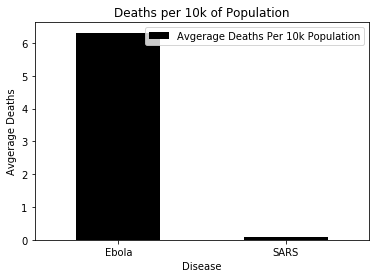

In [54]:
#bar chart of avg. cases per 10K population
fig= plt.figure(figsize=(10,10))
ebola_sars_avg_deaths_10k_df.plot.bar(color= ['black'])
plt.xlabel("Disease")
plt.xticks(rotation=0)
plt.ylabel("Avgerage Deaths")
plt.title("Deaths per 10k of Population")
plt.savefig('Resources/deathsPop.png')